In [76]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image


In [77]:
df_no_outliers = pd.read_csv('new_df_without_outliers_copy_smote_resampled_noNormalised.csv')
df_outliers = pd.read_csv('new_df_outliers_only_copy_smote_resampled_noNormalised.csv')

In [78]:
df_no_outliers['bmi'] = df_no_outliers['bmi'].round().astype(int)
df_no_outliers['age'] = df_no_outliers['age'].round().astype(int)

df_no_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,80,0,1,25,6.600000,140,0.131757,-0.128959,0
1,54,0,0,27,6.600000,80,-0.797024,-0.128959,0
2,28,0,0,27,5.700000,158,0.131757,0.160772,0
3,36,0,0,23,5.000000,155,0.165669,-0.128959,0
4,76,1,1,20,4.800000,155,0.165669,0.160772,0
...,...,...,...,...,...,...,...,...,...
181139,80,0,0,27,6.949298,126,0.554826,0.160772,1
181140,80,0,0,27,5.800000,155,0.313504,-0.052799,1
181141,35,0,0,27,6.995535,159,0.383605,0.160772,1
181142,58,0,0,27,6.017092,155,-0.797024,0.160772,1


In [79]:
df_outliers['bmi'] = df_outliers['bmi'].round().astype(int)
df_outliers['age'] = df_outliers['age'].round().astype(int)
df_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,54,0,0,55,6.000000,100,0.310171,-0.310005,0
1,34,0,0,56,6.200000,200,-0.052540,-0.310005,0
2,67,0,0,63,8.800000,155,-0.052540,-0.310005,1
3,38,0,0,56,6.500000,130,-0.052540,0.561670,0
4,30,0,0,50,6.000000,100,-0.273853,-0.310005,0
...,...,...,...,...,...,...,...,...,...
6163,59,0,0,48,5.914183,158,-0.052540,-0.310005,0
6164,36,0,0,48,4.800000,127,-0.182851,-0.310005,0
6165,16,0,0,51,6.213743,82,-0.179245,-0.310005,0
6166,40,0,0,51,6.401829,155,-0.200757,-0.022104,0


In [80]:
X_no_outliers = df_no_outliers.drop('diabetes', axis=1)
y_no_outliers = df_no_outliers['diabetes']

X_outliers = df_outliers.drop('diabetes', axis=1)
y_outliers = df_outliers['diabetes']

In [81]:
X_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,54,0,0,55,6.000000,100,0.310171,-0.310005
1,34,0,0,56,6.200000,200,-0.052540,-0.310005
2,67,0,0,63,8.800000,155,-0.052540,-0.310005
3,38,0,0,56,6.500000,130,-0.052540,0.561670
4,30,0,0,50,6.000000,100,-0.273853,-0.310005
...,...,...,...,...,...,...,...,...
6163,59,0,0,48,5.914183,158,-0.052540,-0.310005
6164,36,0,0,48,4.800000,127,-0.182851,-0.310005
6165,16,0,0,51,6.213743,82,-0.179245,-0.310005
6166,40,0,0,51,6.401829,155,-0.200757,-0.022104


In [82]:
y_no_outliers

0         0
1         0
2         0
3         0
4         0
         ..
181139    1
181140    1
181141    1
181142    1
181143    1
Name: diabetes, Length: 181144, dtype: int64

# Decision Tree without outliers

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [141]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.5416666666666666, 0.9, 'HbA1c_level <= 5.7\nentropy = 1.0\nsamples = 144915\nvalue = [72447, 72468]'),
 Text(0.25, 0.7, 'HbA1c_level <= 5.35\nentropy = 0.238\nsamples = 37524\nvalue = [36062, 1462]'),
 Text(0.16666666666666666, 0.5, 'entropy = 0.0\nsamples = 30039\nvalue = [30039, 0]'),
 Text(0.3333333333333333, 0.5, 'age <= 55.5\nentropy = 0.712\nsamples = 7485\nvalue = [6023, 1462]'),
 Text(0.16666666666666666, 0.3, 'blood_glucose_level <= 210.0\nentropy = 0.361\nsamples = 4687\nvalue = [4365, 322]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.3\nsamples = 4610\nvalue = [4365, 245]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 77\nvalue = [0, 77]'),
 Text(0.5, 0.3, 'blood_glucose_level <= 113.0\nentropy = 0.975\nsamples = 2798\nvalue = [1658, 1140]'),
 Text(0.4166666666666667, 0.1, 'entropy = 0.0\nsamples = 512\nvalue = [512, 0]'),
 Text(0.5833333333333334, 0.1, 'entropy = 1.0\nsamples = 2286\nvalue = [1146, 1140]'),
 Text(0.8333333333333334, 0.7, 'HbA1c_level <= 6.6\nentro

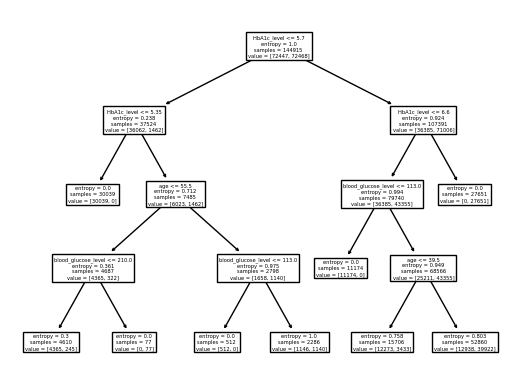

In [142]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_no_outliers.columns.tolist())

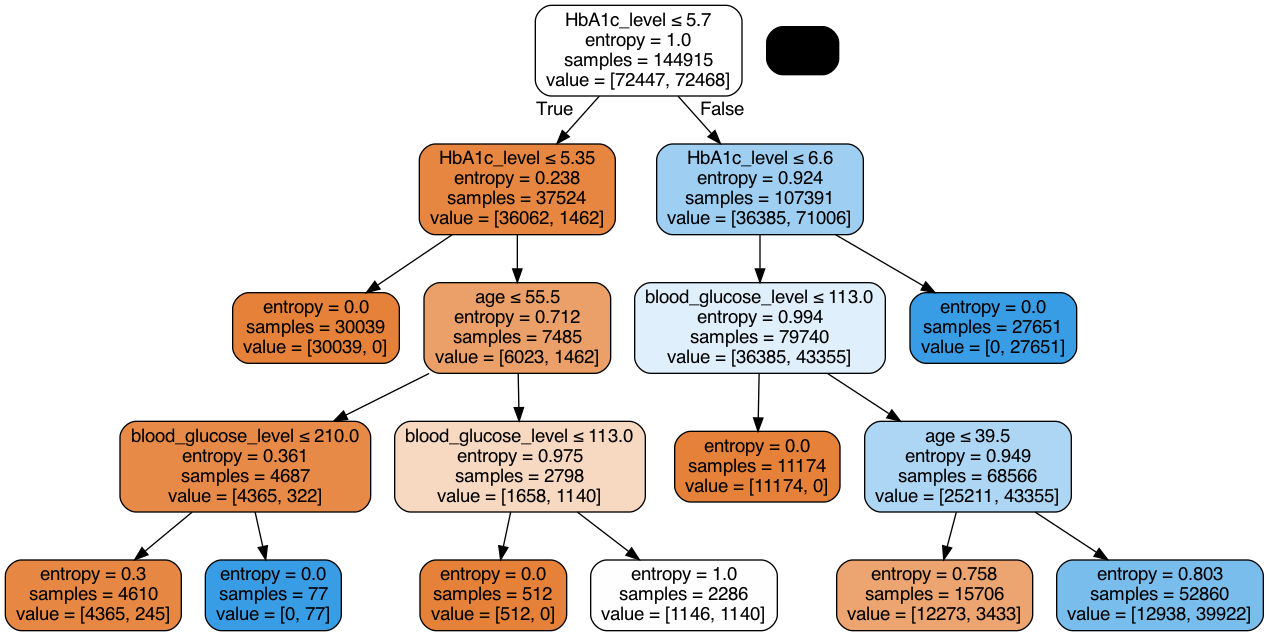

In [143]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

If an individual's HbA1c level is less than or equal to 5.35 -> low risk for diabetes.
High blood glucose levels typically lead to a higher predicted risk of diabetes.
Age can be a factor if HbA1c and blood glucose levels are borderline, being younger than 42.5 might have risk of diabetes

In [144]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
164853,1,1
135988,1,1
170903,1,1
65799,0,1
89383,0,0
611,0,0
83051,0,0
53742,0,0
59548,0,0
124446,1,1


In [145]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[14965,  1232],
       [ 3160, 16872]])

In [146]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))


Accuracy: 0.8787711501835546

Precision: 0.8422523961661342

Recall: 0.93194874060981

F1 score: 0.8848332284455632


<h3>Hyperparameter Tuning</h3>

In [147]:
# It will take around 7 minutes to run.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [200,300,400,500,600],
    'min_samples_leaf': [2000,2500,3000,3500],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
# evaluate the model
# def function to evaluate model
def evaluate_model(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))
# call function
evaluate_model(best_model)
#accuracy_score = best_model.score(X_test, y_test)
print('Best Parameters:',grid_search.best_params_,end='\n\n')
#print('accuracy:', accuracy_score)

Train Accuracy : 0.8946209847151778
Train Confusion Matrix:
[[62179 10268]
 [ 5003 67465]]
--------------------------------------------------
Test Accuracy : 0.8962433409699412
Test Confusion Matrix:
[[15618  2507]
 [ 1252 16852]]
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2000, 'min_samples_split': 200}



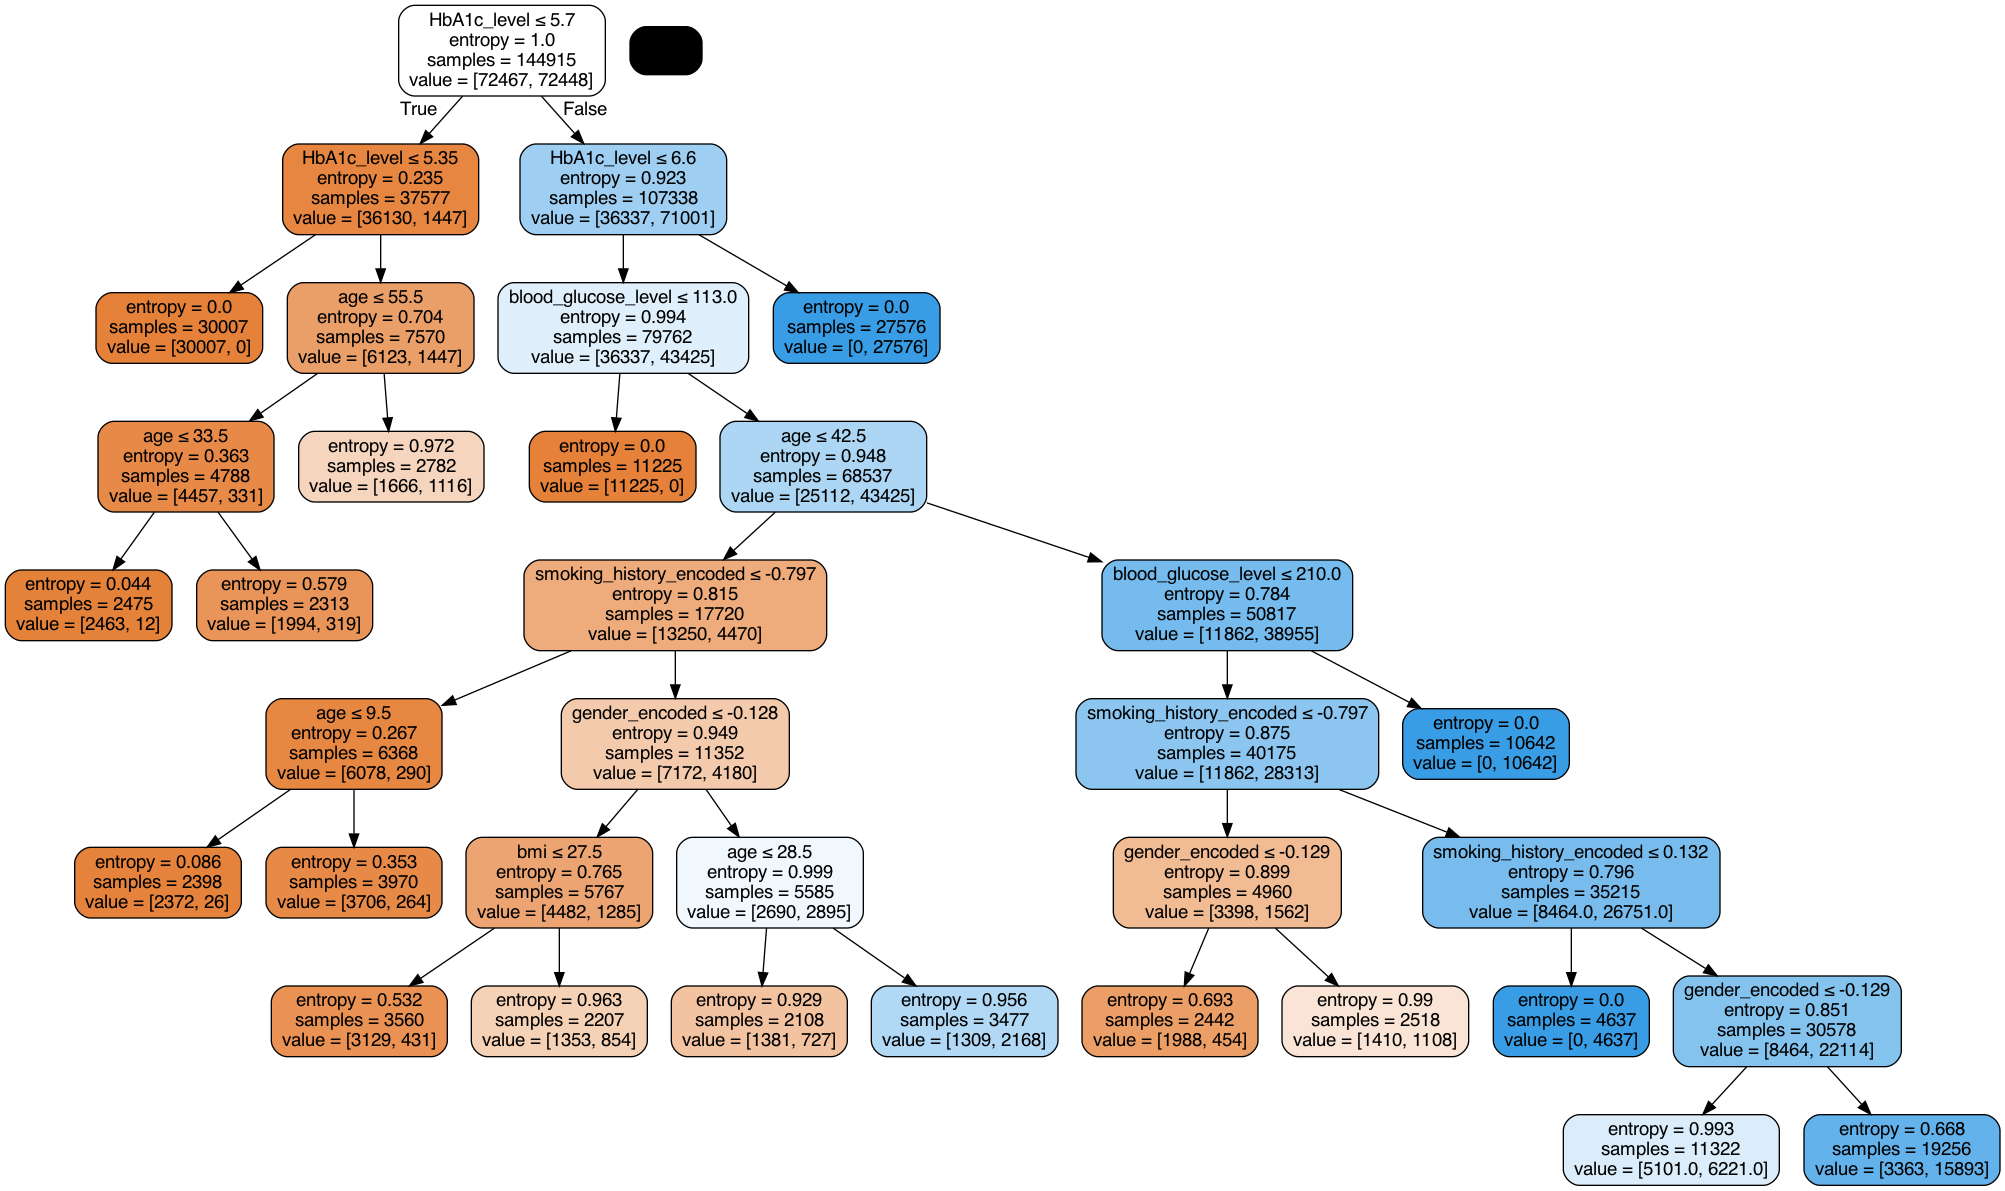

In [138]:
dot_data = StringIO()
export_graphviz(best_model, out_file = dot_data, 
                      feature_names = X_no_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [136]:
# check validation curve for over & under fitting
from sklearn.model_selection import validation_curve


# Decision Tree with outliers

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=424)

In [95]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=424)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=424)

[Text(0.5, 0.9, 'bmi <= 46.5\nentropy = 1.0\nsamples = 4934\nvalue = [2427, 2507]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 2122\nvalue = [0, 2122]'),
 Text(0.6666666666666666, 0.7, 'HbA1c_level <= 6.7\nentropy = 0.576\nsamples = 2812\nvalue = [2427, 385]'),
 Text(0.5, 0.5, 'blood_glucose_level <= 210.0\nentropy = 0.376\nsamples = 2617\nvalue = [2427, 190]'),
 Text(0.3333333333333333, 0.3, 'HbA1c_level <= 5.699\nentropy = 0.246\nsamples = 2530\nvalue = [2427, 103]'),
 Text(0.16666666666666666, 0.1, 'entropy = 0.0\nsamples = 1184\nvalue = [1184, 0]'),
 Text(0.5, 0.1, 'entropy = 0.39\nsamples = 1346\nvalue = [1243.0, 103.0]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 87\nvalue = [0, 87]'),
 Text(0.8333333333333334, 0.5, 'entropy = 0.0\nsamples = 195\nvalue = [0, 195]')]

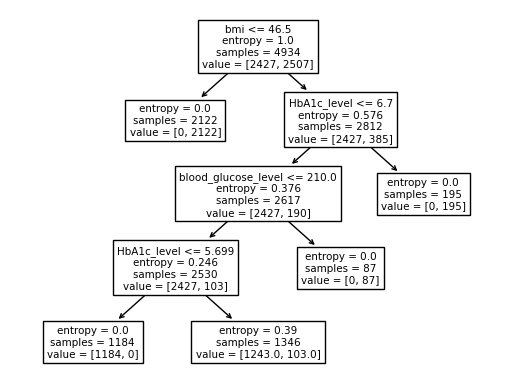

In [96]:
plot_tree(dtree.fit(X_train, y_train),feature_names=X_outliers.columns.tolist())

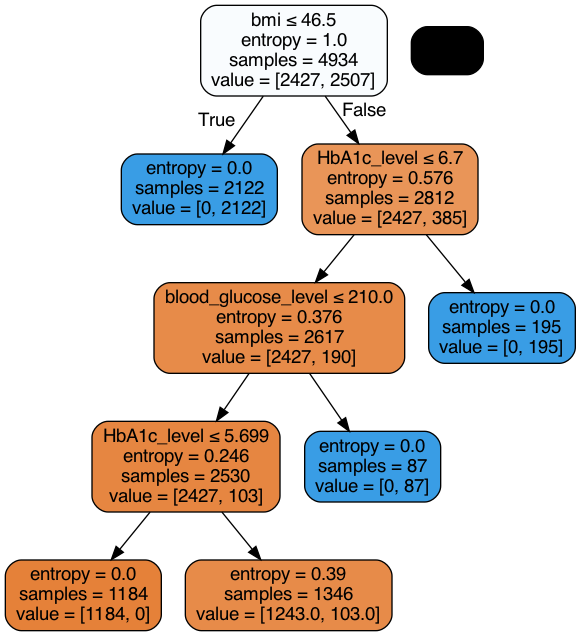

In [97]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, 
                      feature_names = X_outliers.columns,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Individuals with bmi less than 46.5 are diabetic...

In [98]:
# get predictions 
predictions = dtree.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
5872,0,0
2073,1,1
3777,1,1
3914,1,1
318,0,0
4514,0,0
6029,0,0
2673,1,1
3733,1,1
2540,1,1


In [99]:
conf_matrix = confusion_matrix(predictions,y_test)
conf_matrix

array([[657,  31],
       [  0, 546]])

In [100]:
# Performance Evaluation 
print('Accuracy:',accuracy_score(y_test, predictions))

print('\nPrecision:',precision_score(y_test, predictions))

print('\nRecall:',recall_score(y_test, predictions))

print('\nF1 score:',f1_score(y_test, predictions))
#dtree.score(X_test, y_test)

Accuracy: 0.9748784440842788

Precision: 1.0

Recall: 0.9462738301559792

F1 score: 0.9723953695458593


<h3>Hyperparameter Tuning</h3>

In [101]:
# Faster at around 16secs
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy'] 
}

decision_tree_model = DecisionTreeClassifier(random_state=424)

grid_search = GridSearchCV(decision_tree_model, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
#accuracy_score = best_model.score(X_test, y_test)
print('Best Parameters:',grid_search.best_params_,end='\n\n')
evaluate_model(best_model)
#print('accuracy:', accuracy_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 20}

Train Accuracy : 0.9821645723550871
Train Confusion Matrix:
[[2404   23]
 [  65 2442]]
--------------------------------------------------
Test Accuracy : 0.9773095623987034
Test Confusion Matrix:
[[652   5]
 [ 23 554]]
